# Retail Inventory, Sales & Purchase – Exploratory Data Analysis

**Objective:**  
Understand sales, purchase, and inventory patterns to support demand forecasting and inventory optimization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("default")

In [ ]:
sales = pd.read_csv('D:/Projects/inventory_optimization/data/SalesFINAL12312016.csv')
purchases_df = pd.read_csv('D:/Projects/inventory_optimization/data/PurchasesFINAL12312016.csv')
beg_inv = pd.read_csv('D:/Projects/inventory_optimization/data/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('D:/Projects/inventory_optimization/data/EndInvFINAL12312016.csv')


In [59]:
sales.shape, beg_inv.shape, end_inv.shape

((1048575, 14), (206529, 9), (224489, 9))

In [60]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [61]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [62]:
sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [63]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


- Sales data contains transactional records including product, store, quantity, and sales value.
- Inventory snapshots are available at the beginning and end of the year.
- Data is sufficiently granular for time-series and product-level analysis.


In [64]:
# Data Cleaning
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])


In [65]:
sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [69]:
sales[sales['SalesQuantity'] <= 0]

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName


In [ ]:
sales[sales['SalesDollars'] <= 0]

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName


- There are no null values in the data 
- There are no negative or zero values in the data. All the transactions are valid. 

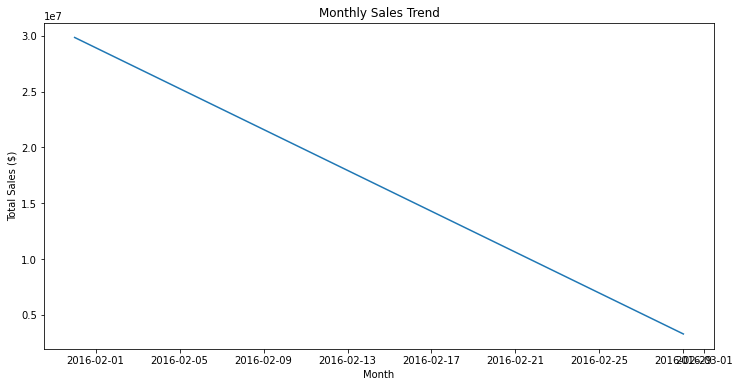

In [70]:
monthly_sales = (
    sales
    .set_index("SalesDate")
    .resample("M")["SalesDollars"]
    .sum()
)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()


The overall monthly sales show a declining trend across the observed period. This may be influenced by seasonality, changes in inventory availability, or data coverage limitations. A rolling average smooths short-term volatility and provides a clearer view of demand patterns. Since the dataset spans a limited time window, long-term growth conclusions cannot be inferred.

In [71]:
sales["SalesDate"].min(), sales["SalesDate"].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-02-29 00:00:00'))

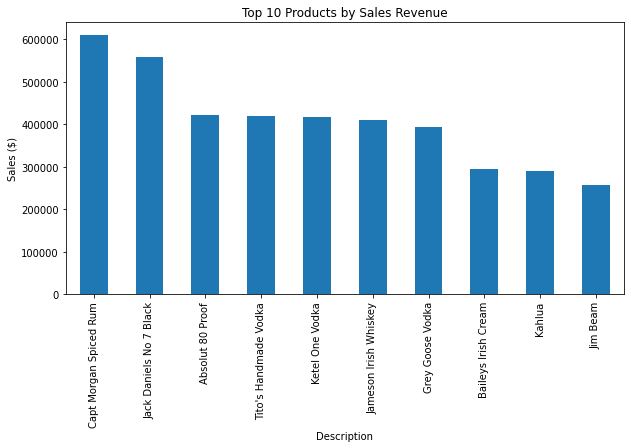

In [84]:
# Product Performance

top_products = (
    sales.groupby("Description")["SalesDollars"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Sales Revenue")
plt.ylabel("Sales ($)")
plt.show()


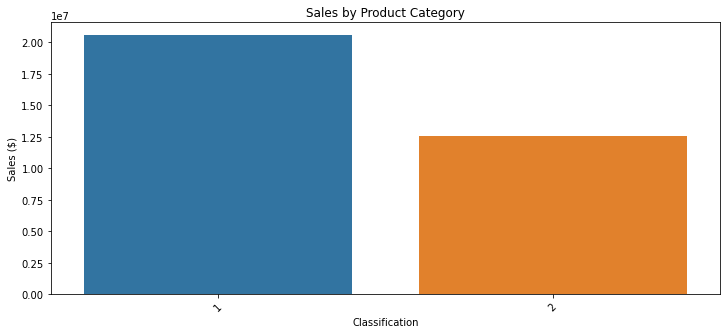

In [76]:
# Category-level analysis
category_sales = (
    sales.groupby("Classification")["SalesDollars"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xticks(rotation=45)
plt.title("Sales by Product Category")
plt.ylabel("Sales ($)")
plt.show()


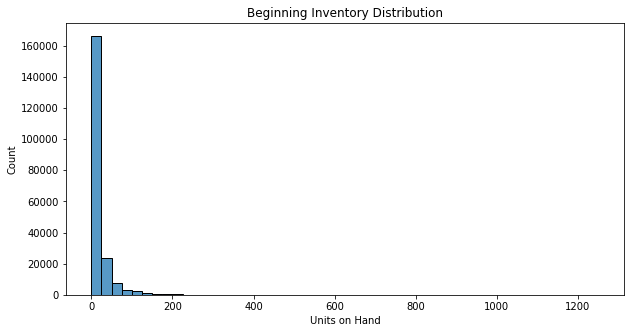

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(beg_inv["onHand"], bins=50)
plt.title("Beginning Inventory Distribution")
plt.xlabel("Units on Hand")
plt.show()


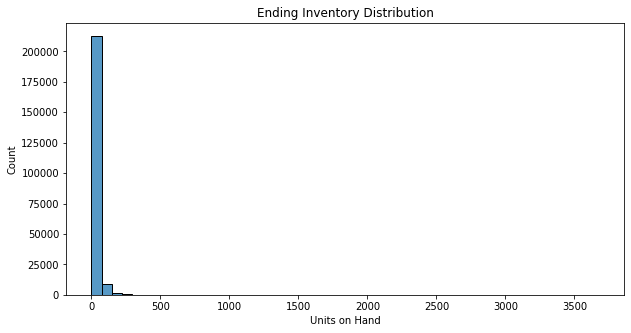

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(end_inv["onHand"], bins=50)
plt.title("Ending Inventory Distribution")
plt.xlabel("Units on Hand")
plt.show()


- Inventory levels vary significantly across products.
- Differences between beginning and ending inventory suggest uneven stock movement.

In [80]:
purchases_df.shape, purchases_df.columns, purchases_df.head()


((2372474, 16),
 Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
        'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
        'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
       dtype='object'),
            InventoryId  Store  Brand                   Description   Size  \
 0    69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL   
 1     30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L   
 2    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L   
 3  1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L   
 4    76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL   
 
    VendorNumber                   VendorName  PONumber      PODate  \
 0           105  ALTAMAR BRANDS LLC               8124  2015-12-21   
 1          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
 2          4466  AMERICAN VINTAGE BEVERAGE

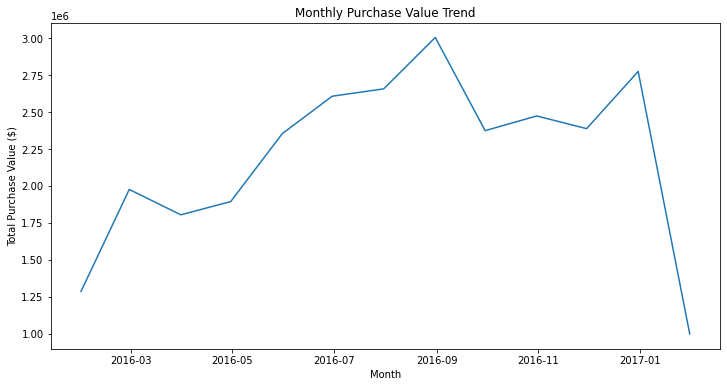

In [82]:
purchases_df['InvoiceDate'] = pd.to_datetime(purchases_df['InvoiceDate'])

monthly_purchases = (
    purchases_df
    .set_index("InvoiceDate")
    .resample("M")["PurchasePrice"]
    .sum()
)

plt.figure(figsize=(12,6))
plt.plot(monthly_purchases.index, monthly_purchases.values)
plt.title("Monthly Purchase Value Trend")
plt.xlabel("Month")
plt.ylabel("Total Purchase Value ($)")
plt.show()
